In [1]:
from os import listdir
from os.path import isfile, join
import re
import csv
import gensim
import numpy as np
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors
from gensim.models.wrappers import FastText
import logging
import os
import pandas as pd 
import sys
import sklearn.metrics
import sklearn
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import random
import math
import warnings
import utils
from utils import *
import scipy.stats
from dataDictionariesLexicons import *
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
random.seed(1)

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
# warnings.filterwarnings('ignore')

sys.path.insert(0, '../') # necessary in order to import word2vecTraining where the epoch saver class, which is part of the model, is located

In [2]:
modelsPath = os.path.normpath(r'D:\data\wordVectors') 
# modelFilePath = os.path.join(modelsPath, 'GoogleNews-vectors-negative300.bin')
# model2 = KeyedVectors.load_word2vec_format(modelFilePath,binary=True) 
modelFilePath = os.path.join(modelsPath, 'GoogleNews-vectors-negative300LowerCase.bin')
model1 = KeyedVectors.load(modelFilePath) 

In [3]:
modelsPath = os.path.normpath(r'D:\data\wordVectors') 
modelFilePath = os.path.join(modelsPath, 'glove.6B.300d.txt.word2vec.bin')
model2 = KeyedVectors.load_word2vec_format(modelFilePath,binary=True) 

In [4]:
modelsPath = os.path.normpath(r'D:\data\wordVectors') 
modelFilePath = os.path.join(modelsPath, 'glove.twitter.27B.200d.txt.word2vec.bin')
model3 = KeyedVectors.load(modelFilePath) 

In [5]:
modelsPath = os.path.normpath(r'D:\data\wordVectors') 
modelFilePath = os.path.join(modelsPath, 'glove.42B.300d.txt.word2vec.bin')
model4 = KeyedVectors.load(modelFilePath) 

In [6]:
modelsPath = os.path.normpath(r'D:\data\wordVectors') 
modelFilePath = os.path.join(modelsPath, 'glove.840B.300d.txt.word2vec.bin')
model5 = KeyedVectors.load(modelFilePath) 

In [7]:
modelsPath = os.path.normpath(r'D:\data\wordVectors') 
modelFilePath = os.path.join(modelsPath, 'fastext-common-crawl-300d-2M-subword.bin')
model6 = KeyedVectors.load(modelFilePath)

In [8]:
modelsPath = os.path.normpath(r'D:\data\wordVectors') 
modelFilePath = os.path.join(modelsPath, 'fastext-wiki-news-300d-1M-subword-Original.bin')
model7 = KeyedVectors.load(modelFilePath)

## One Plot

In [9]:
model = model1

In [10]:
# RealDataTemp = intelligentDullAdjetives38 #Load real data dictionary
RealDataTemp = niceMeanAdjetives228 #Load real data dictionary
# RealDataTemp = positiveNegativeAdjetives197#Load real data dictionary
RealDataTemp = inquirerViceVirtue1277#Load real data dictionary
RealDataTemp = positiveNegativeAdjetives762#Load real data dictionary
RealDataTemp = afinnLexicon2477#Load real data dictionary
RealDataTemp = {
    **WEAT1,**harvardGeneralInquirer3623,**vaderLexicon7062,**NRCEmotionLexicon5555,**opinionLexicon6786,**afinnLexicon2477,
    **positiveNegativeAdjetives762,**positiveNegativeAdjetives197,**happySadAdjectives122, **niceMeanAdjetives228, **intelligentDullAdjetives75,
    **inquirerViceVirtue1277,**inquirerHostileAffiliation1176,**inquirerPowerConflictCooperation294,**inquirerEnlightenmentLossGain151,**inquirerTransactionLossGain197,**inquirerAffectNegativePositive261
               }#Merging dictionaries
# RealDataTemp = positiveNegativeAdjetives197
# RealData = realDataFilter(model,RealDataTemp,0)#Filter out terms not in model vocabulary (Last parameter Flag prints out OOV words)

## Assemble lexicon size

In [11]:
sum(x<0 for x in list(RealDataTemp.values()))

9181

In [14]:
len(RealDataTemp)

15635

In [15]:
models = [model1,model2,model3,model4,model5,model6,model7]
dataSetIndexes = ['1-4','8-1']
# dataSetIndexes = ['1-1','8-1']

dataFrameAggregate = pd.DataFrame(index=RealDataTemp.keys(), columns=['df1','df2','df3','df4','df5','df6','df7','df8',
                                                                  'df9','df10','df11','df12','df13','df14'
                                                                 ])

In [16]:
i=1
for modelIndex, model in enumerate(models):
    RealData = realDataFilter(model,RealDataTemp,0)#Filter out terms not in model vocabulary (Last parameter Flag prints out OOV words)
    for dataSetIndex in dataSetIndexes:
        print(dataDict[dataSetIndex]['name'])
        constructPole1 = dataDict[dataSetIndex]['constructPole1']
        constructPole2 = dataDict[dataSetIndex]['constructPole2']
        if modelIndex>=1: #Glove and fastext vocabulary uses - instead of _ So we need to alter Construct poles and real data - Checked!
            constructPole1,constructPole2,RealDataTemp=replaceUnderscoreForDash(constructPole1,constructPole2,RealDataTemp)
        if modelIndex in [1,2,3]: # Lowercase poles for models With only lowercase vocabularies - Checked!
            constructPole1 = list(set(list(map(str.lower,constructPole1))))
            constructPole2 = list(set(list(map(str.lower,constructPole2))))
        
        constructPole1,constructPole2 = constructsFilter(model,constructPole1,constructPole2)# Filter out terms not in model vocabulary

        RealData = realDataFilter(model,RealDataTemp,0)#Filter out terms not in model vocabulary (Last parameter Flag prints out OOV words)

        Axis = dimensionN(model, constructPole1,constructPole2)  
        AxisName='Axis'
        dataFrame = makeDF(model, RealData.keys(),Axis,AxisName)
        dataFrame['RealValues']=RealData.values()
        calculateCorrelations(dataFrame)
        print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
        
        dataFrameAggregate['df'+str(i)] = dataFrame['Axis'] 
        i+=1
    

gender masculinity and femininity
Missing words from constructPole1 []
Missing words from constructPole2 []
Spearman:  SpearmanrResult(correlation=0.22887249393207976, pvalue=3.640036677258026e-164)
Pearson:  (0.24612513935926647, 2.4702878890204895e-190)
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
personal ideology
Missing words from constructPole1 ['right_winger', 'right_wingers', 'right_wing', 'right_leaning']
Missing words from constructPole2 ['left_winger', 'left_wingers', 'left_wing', 'left_leaning']
Spearman:  SpearmanrResult(correlation=0.09638500071784036, pvalue=5.717513674577577e-30)
Pearson:  (0.10543843190625046, 1.457562044394522e-35)
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
gender masculinity and femininity
Missing words from constructPole1 []
Missing words from constructPole2 []
Spearman:  SpearmanrResult(correlation=0.20380712354493677, pvalue=6.475777767500642e-125)
Pearson:  (0.22386824155729912, 5.766195932068742e-151)


In [17]:
dataFrameAggregate['RealValues'] = dataFrame['RealValues'] #Word Labels 1 or -1

dataFrameAggregatePositive = dataFrameAggregate[dataFrameAggregate['RealValues'] > 0]
dataFrameAggregateNegative = dataFrameAggregate[dataFrameAggregate['RealValues'] < 0]

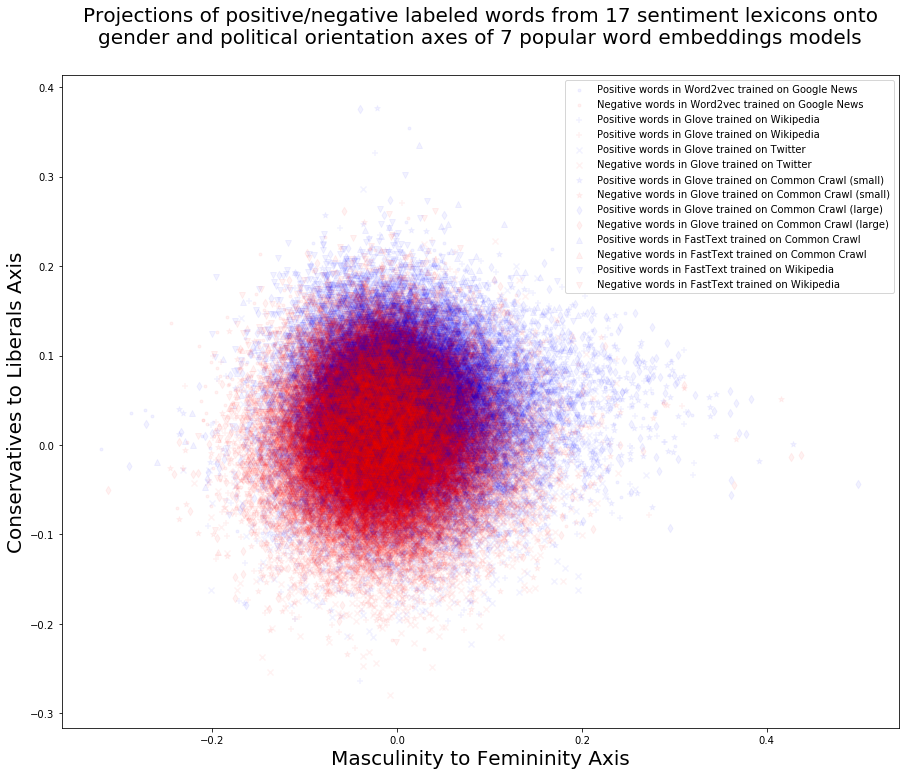

In [18]:
import matplotlib.pyplot as plt
# Plot
plt.rcParams['figure.figsize'] = [15, 12]
alphaValue = 0.05
plt.scatter(dataFrameAggregatePositive['df1'], dataFrameAggregatePositive['df2'], alpha=alphaValue,marker='.',color='b',label='Positive words in Word2vec trained on Google News')
plt.scatter(dataFrameAggregateNegative['df1'], dataFrameAggregateNegative['df2'], alpha=alphaValue,marker='.',color='r',label='Negative words in Word2vec trained on Google News')

plt.scatter(dataFrameAggregatePositive['df3'], dataFrameAggregatePositive['df4'], alpha=alphaValue,marker='+',color='b',label='Positive words in Glove trained on Wikipedia')
plt.scatter(dataFrameAggregateNegative['df3'], dataFrameAggregateNegative['df4'], alpha=alphaValue,marker='+',color='r',label='Positive words in Glove trained on Wikipedia')

plt.scatter(dataFrameAggregatePositive['df5'], dataFrameAggregatePositive['df6'], alpha=alphaValue,marker='x',color='b',label='Positive words in Glove trained on Twitter')
plt.scatter(dataFrameAggregateNegative['df5'], dataFrameAggregateNegative['df6'], alpha=alphaValue,marker='x',color='r',label='Negative words in Glove trained on Twitter')

plt.scatter(dataFrameAggregatePositive['df7'], dataFrameAggregatePositive['df8'], alpha=alphaValue,marker='*',color='b',label='Positive words in Glove trained on Common Crawl (small)')
plt.scatter(dataFrameAggregateNegative['df7'], dataFrameAggregateNegative['df8'], alpha=alphaValue,marker='*',color='r',label='Negative words in Glove trained on Common Crawl (small)')

plt.scatter(dataFrameAggregatePositive['df9'], dataFrameAggregatePositive['df10'], alpha=alphaValue,marker='d',color='b',label='Positive words in Glove trained on Common Crawl (large)')
plt.scatter(dataFrameAggregateNegative['df9'], dataFrameAggregateNegative['df10'], alpha=alphaValue,marker='d',color='r',label='Negative words in Glove trained on Common Crawl (large)')

plt.scatter(dataFrameAggregatePositive['df11'], dataFrameAggregatePositive['df12'], alpha=alphaValue,marker='^',color='b',label='Positive words in FastText trained on Common Crawl')
plt.scatter(dataFrameAggregateNegative['df11'], dataFrameAggregateNegative['df12'], alpha=alphaValue,marker='^',color='r',label='Negative words in FastText trained on Common Crawl')

plt.scatter(dataFrameAggregatePositive['df13'], dataFrameAggregatePositive['df14'], alpha=alphaValue,marker='v',color='b',label='Positive words in FastText trained on Wikipedia')
plt.scatter(dataFrameAggregateNegative['df13'], dataFrameAggregateNegative['df14'], alpha=alphaValue,marker='v',color='r',label='Negative words in FastText trained on Wikipedia')

# plt.scatter([0.15], [0.25], alpha=0.9)
plt.title('Projections of positive/negative labeled words from 17 sentiment lexicons onto\ngender and political orientation axes of 7 popular word embeddings models',size=20, y=1.04)
labels=list(dataFrameAggregate.index)
# for i, txt in enumerate(labels):
#     try:
#         plt.annotate(txt, (dataFrameAggregate['df1'][i],dataFrameAggregate['df2'][i]))
#         plt.annotate(txt, (dataFrameAggregate['df3'][i],dataFrameAggregate['df4'][i]))
#         plt.annotate(txt, (dataFrameAggregate['df5'][i],dataFrameAggregate['df6'][i]))
#         plt.annotate(txt, (dataFrameAggregate['df7'][i],dataFrameAggregate['df8'][i]))
#         plt.annotate(txt, (dataFrameAggregate['df9'][i],dataFrameAggregate['df10'][i]))
#         plt.annotate(txt, (dataFrameAggregate['df11'][i],dataFrameAggregate['df12'][i]))
#         plt.annotate(txt, (dataFrameAggregate['df13'][i],dataFrameAggregate['df14'][i]))
#     except:
#         pass

plt.xlabel("Masculinity to Femininity Axis",size=20)
plt.ylabel("Conservatives to Liberals Axis",size=20)
plt.legend()

# plt.annotate('local max', xy=(0.2, 0.2), xytext=(-0.2, 0.2),)
# plt.text(-0.34, -.36, r'masculine, masculinity',bbox=dict(facecolor='grey', alpha=0.5),size=10)
# plt.text(0.43, -.36, r'feminine, femininity',bbox=dict(facecolor='grey', alpha=0.5),size=10)

# plt.text(-0.45, -.19, 'conservative, conservatives,\nright-winger, right-wingers,\nright-leaning, right-wing',rotation=90,size=12,bbox=dict(facecolor='grey', alpha=0.5))
# plt.text(-0.45, .43, 'liberal, liberals,\nleft-winger, left-wingers,\nleft-leaning, left-wing',rotation=90,size=12,bbox=dict(facecolor='grey', alpha=0.5))

plt.show()

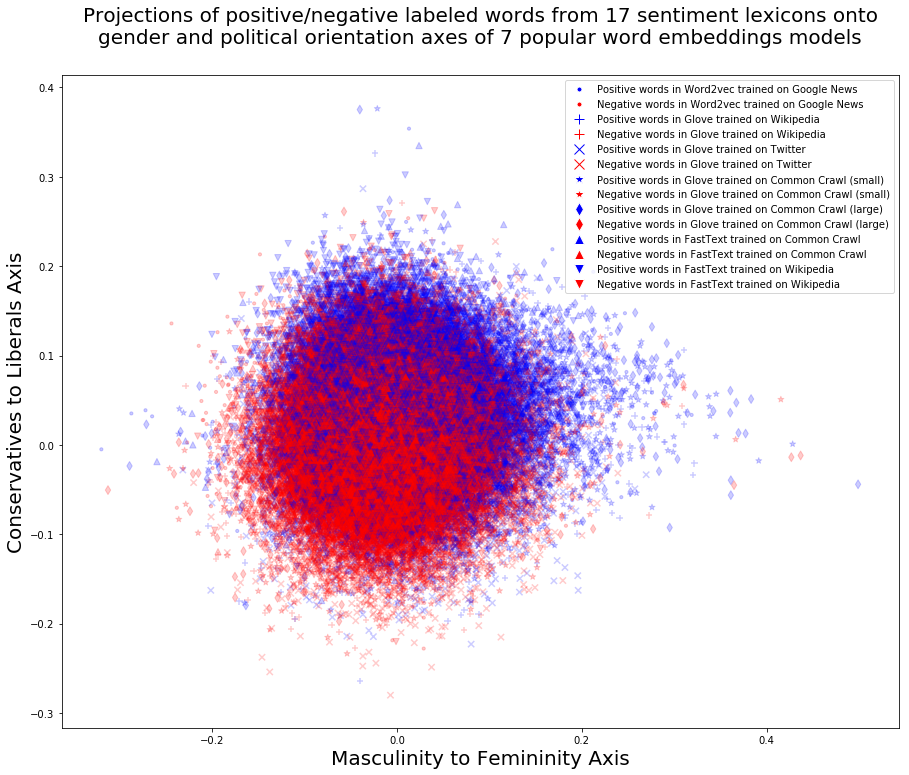

In [19]:
# Plot
plt.rcParams['figure.figsize'] = [15, 12]
alphaValue = 0.2

#Colors is a list containing 'b' (blue) for dataFrameAggregate['RealValues']>0 and 'r' (red) for dataFrameAggregate['RealValues']<0
colors = list(map(lambda x: 'b' if x == True else 'r', dataFrameAggregate['RealValues']>0))

plt.scatter(dataFrameAggregate['df1'], dataFrameAggregate['df2'],s=40, alpha=alphaValue,marker='.',c=colors,)

plt.scatter(dataFrameAggregate['df3'], dataFrameAggregate['df4'],s=40, alpha=alphaValue,marker='+',c=colors,)

plt.scatter(dataFrameAggregate['df5'], dataFrameAggregate['df6'],s=40, alpha=alphaValue,marker='x',c=colors,)

plt.scatter(dataFrameAggregate['df7'], dataFrameAggregate['df8'],s=40, alpha=alphaValue,marker='*',c=colors,)

plt.scatter(dataFrameAggregate['df9'], dataFrameAggregate['df10'],s=40, alpha=alphaValue,marker='d',c=colors,)
plt.scatter(dataFrameAggregate['df11'], dataFrameAggregate['df12'],s=40, alpha=alphaValue,marker='^',c=colors,)
plt.scatter(dataFrameAggregate['df13'], dataFrameAggregate['df14'],s=40, alpha=alphaValue,marker='v',c=colors,)


# alpha=alphaValue,marker='^',color='b',label='Positive words in FastText trained on Common Crawl')
# alpha=alphaValue,marker='^',color='r',label='Negative words in FastText trained on Common Crawl')

# alpha=alphaValue,marker='v',color='b',label='Positive words in FastText trained on Wikipedia')
# alpha=alphaValue,marker='v',color='r',label='Negative words in FastText trained on Wikipedia')

# plt.scatter([0.15], [0.25], alpha=0.9)
plt.title('Projections of positive/negative labeled words from 17 sentiment lexicons onto\ngender and political orientation axes of 7 popular word embeddings models',size=20, y=1.04)
labels=list(dataFrameAggregate.index)

plt.xlabel("Masculinity to Femininity Axis",size=20)
plt.ylabel("Conservatives to Liberals Axis",size=20)

alphaValueLegend=1
legend_elements = [
    Line2D([0], [0], marker='.', color='w', markerfacecolor='b', label='Positive words in Word2vec trained on Google News', markersize=10),
    Line2D([0], [0], marker='.', color='w', markerfacecolor='r', label='Negative words in Word2vec trained on Google News', markersize=10),
    Line2D([0], [0], marker='+', color='b', linewidth=0, markerfacecolor='b', label='Positive words in Glove trained on Wikipedia', markersize=10),
    Line2D([0], [0], marker='+', color='r', linewidth=0,markerfacecolor='r', label='Negative words in Glove trained on Wikipedia', markersize=10),
    Line2D([0], [0], marker='x', color='b', linewidth=0, markerfacecolor='b', label='Positive words in Glove trained on Twitter', markersize=10),
    Line2D([0], [0], marker='x', color='r', linewidth=0, markerfacecolor='r', label='Negative words in Glove trained on Twitter', markersize=10),
    Line2D([0], [0], marker='*', color='w', markerfacecolor='b', label='Positive words in Glove trained on Common Crawl (small)', markersize=10),
    Line2D([0], [0], marker='*', color='w', markerfacecolor='r', label='Negative words in Glove trained on Common Crawl (small)', markersize=10),
    Line2D([0], [0], marker='d', color='w', markerfacecolor='b', label='Positive words in Glove trained on Common Crawl (large)', markersize=10),
    Line2D([0], [0], marker='d', color='w', markerfacecolor='r', label='Negative words in Glove trained on Common Crawl (large)', markersize=10),
    Line2D([0], [0], marker='^', color='w', markerfacecolor='b', label='Positive words in FastText trained on Common Crawl', markersize=10),
    Line2D([0], [0], marker='^', color='w', markerfacecolor='r', label='Negative words in FastText trained on Common Crawl', markersize=10),
    Line2D([0], [0], marker='v', color='w', markerfacecolor='b', label='Positive words in FastText trained on Wikipedia', markersize=10),
    Line2D([0], [0], marker='v', color='w', markerfacecolor='r', label='Negative words in FastText trained on Wikipedia', markersize=10),
                   
                  ]
plt.legend(handles=legend_elements, loc='upper right',prop={'size': 10})

# plt.annotate('local max', xy=(0.2, 0.2), xytext=(-0.2, 0.2),)
# plt.text(-0.34, -.36, r'masculine, masculinity',bbox=dict(facecolor='grey', alpha=0.5),size=10)
# plt.text(0.43, -.36, r'feminine, femininity',bbox=dict(facecolor='grey', alpha=0.5),size=10)

# plt.text(-0.45, -.19, 'conservative, conservatives,\nright-winger, right-wingers,\nright-leaning, right-wing',rotation=90,size=12,bbox=dict(facecolor='grey', alpha=0.5))
# plt.text(-0.45, .43, 'liberal, liberals,\nleft-winger, left-wingers,\nleft-leaning, left-wing',rotation=90,size=12,bbox=dict(facecolor='grey', alpha=0.5))
plt.savefig('../../paper/figures/2DAlpha0-2.png',dpi=300,bbox_inches='tight',pad_inches=0)
# plt.savefig('t1.png',dpi=400)
plt.show()